# Cirebon Mask Classification Using Combined Feature Texture and K-Nearest Neighbour Algorithm

## Import Library

In [24]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load Dataset

In [2]:
trainData = pd.read_csv('data/dfCOMB_train.csv')
testData = pd.read_csv('data/dfCOMB_test.csv')
trainLabels = pd.read_csv('data/dfLTRAIN_train.csv')
testLabels = pd.read_csv('data/dfLTEST_test.csv')

In [3]:
combine = [trainData, testData, trainLabels, testLabels]
pd.concat(combine)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,506.93771,742.165345,530.442081,866.671751,0.175163,0.169320,0.177496,0.170005,0.900115,0.853773,...,2558.0,1.457192,94.966967,2331.0,1.493424,42.337827,2522.0,1.457192,94.966967,2331.0
1,452.071782,681.159091,506.568929,794.563131,0.161801,0.155731,0.162771,0.155705,0.891290,0.836331,...,2459.0,1.437986,90.326067,2156.0,1.487348,42.582395,2488.0,1.437986,90.326067,2156.0
2,582.026985,1399.285502,1102.061912,1376.575312,0.142958,0.136409,0.146532,0.136338,0.925417,0.820684,...,2421.0,1.448868,146.854179,1639.0,1.507132,64.738904,2884.0,1.460113,150.130284,1727.0
3,596.368576,1427.003788,1116.916471,1399.538844,0.137422,0.131195,0.140620,0.130976,0.925253,0.821180,...,2400.0,1.451992,146.087635,1666.0,1.499120,65.412871,2766.0,1.464932,149.259490,1765.0
4,596.368576,1427.003788,1116.916471,1399.538844,0.137422,0.131195,0.140620,0.130976,0.925253,0.821180,...,2400.0,1.451992,146.087635,1666.0,1.499120,65.412871,2766.0,1.464932,149.259490,1765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [4]:
# Transform images to array
train = np.array(trainData)
test = np.array(testData)
train_label = np.array(trainLabels)
test_label = np.array(testLabels)

In [5]:
X_train = train
y_train = train_label
print(X_train)

[[5.06937710e+02 7.42165345e+02 5.30442081e+02 ... 1.45719228e+00
  9.49669670e+01 2.33100000e+03]
 [4.52071782e+02 6.81159091e+02 5.06568929e+02 ... 1.43798618e+00
  9.03260668e+01 2.15600000e+03]
 [5.82026985e+02 1.39928550e+03 1.10206191e+03 ... 1.46011291e+00
  1.50130284e+02 1.72700000e+03]
 ...
 [4.46644395e+02 6.37968278e+02 3.85697438e+02 ... 1.52637219e+00
  9.50370821e+01 1.64500000e+03]
 [4.49162941e+02 6.45556641e+02 3.87452975e+02 ... 1.52869730e+00
  9.48435252e+01 1.66800000e+03]
 [4.44997268e+02 6.43593455e+02 3.83911488e+02 ... 1.52466067e+00
  9.46614078e+01 1.64800000e+03]]


In [8]:
# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_train[:,0])
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [9]:
# Normalize the feature data
X = X_train.astype('float32') / 255.0
print(X.shape)

(1000, 28)


In [10]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.48636612 -0.46213073 -0.39995366 ...  0.7716364  -1.3010662
   2.2166388 ]
 [ 0.00774367 -0.6631873  -0.4906403  ...  0.5133294  -1.4669949
   1.7250417 ]
 [ 1.141407    1.7035221   1.771455   ...  0.8109163   0.6712162
   0.5199271 ]
 ...
 [-0.03960183 -0.8055302  -0.9497941  ...  1.7020465  -1.2985594
   0.2895786 ]
 [-0.01763167 -0.7805213  -0.9431255  ...  1.7333174  -1.3054796
   0.3541885 ]
 [-0.05397086 -0.7869913  -0.95657843 ...  1.679029   -1.311991
   0.29800618]]


## Splitting Data

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Training : ", X_train.shape, y_train.shape)
print("Data Testing : ", X_test.shape, y_test.shape)

Data Training :  (800, 28) (800,)
Data Testing :  (200, 28) (200,)


## Modelling

In [12]:
# Modelling using K-Nearest Neighbour
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# Class model for data labels
model_knn.classes_

array([0, 1, 2, 3, 4])

In [14]:
# Predict the model
y_pred = model_knn.predict(X_test)
print(f'Prediksi model K-NN yaitu... {y_pred}')

Prediksi model SVM yaitu... [2 3 3 3 2 3 3 2 4 0 4 0 3 4 4 4 1 4 3 1 2 0 1 2 1 1 0 4 4 4 1 0 3 2 1 0 3
 2 4 0 1 0 1 4 1 1 4 3 2 4 2 4 1 2 0 0 3 0 1 4 1 0 2 1 3 3 3 4 0 2 0 2 2 3
 1 1 3 0 2 1 3 0 1 0 1 2 4 3 3 1 1 2 2 1 3 2 3 0 0 4 3 1 4 1 3 3 2 4 0 4 2
 4 4 4 0 2 0 4 2 1 4 2 3 1 1 2 2 2 4 4 2 4 1 4 2 0 0 1 0 0 0 1 3 1 4 4 4 1
 4 1 3 0 4 2 4 2 1 3 0 4 2 3 3 3 4 3 1 3 1 1 1 2 0 4 2 1 1 1 4 3 2 3 1 2 4
 0 1 1 4 3 4 4 3 0 1 2 1 1 3 0]


In [15]:
# Perintah untuk mencetak hasil apakah data aktual telah sesuai atau tidak?
print("Aktual data yaitu : ")
np.array(y_test)

Aktual data yaitu : 


array([2, 3, 3, 3, 2, 3, 3, 2, 4, 0, 4, 0, 3, 4, 4, 4, 1, 4, 3, 1, 2, 0,
       1, 2, 1, 1, 0, 4, 4, 4, 1, 0, 3, 2, 1, 0, 3, 2, 4, 0, 1, 0, 1, 4,
       1, 1, 4, 3, 2, 4, 2, 4, 1, 2, 0, 0, 3, 0, 1, 4, 1, 0, 2, 1, 3, 3,
       3, 4, 0, 2, 0, 2, 2, 3, 1, 1, 3, 0, 2, 1, 3, 0, 1, 0, 1, 2, 4, 3,
       3, 1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 4, 3, 1, 4, 1, 3, 3, 2, 4, 0, 4,
       2, 4, 4, 4, 0, 2, 0, 4, 2, 1, 4, 2, 3, 1, 1, 2, 2, 2, 4, 4, 2, 4,
       1, 4, 2, 0, 0, 1, 0, 0, 0, 1, 3, 1, 4, 4, 4, 1, 4, 1, 3, 0, 4, 2,
       4, 2, 1, 3, 0, 4, 2, 3, 3, 3, 4, 3, 1, 3, 1, 1, 1, 2, 0, 4, 2, 1,
       1, 1, 4, 3, 2, 3, 1, 2, 4, 0, 1, 1, 4, 3, 4, 4, 3, 0, 1, 2, 1, 1,
       3, 0])

## Evaluation Model

In [16]:
print("Train set Accuracy : ", accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy : ", accuracy_score(y_test, y_pred))

Train set Accuracy :  1.0
Test set Accuracy :  1.0


In [18]:
knn_classifier_report = classification_report(y_test, y_pred)
print(f"K-NN Classification Report:\n{knn_classifier_report}")

K-NN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        44

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



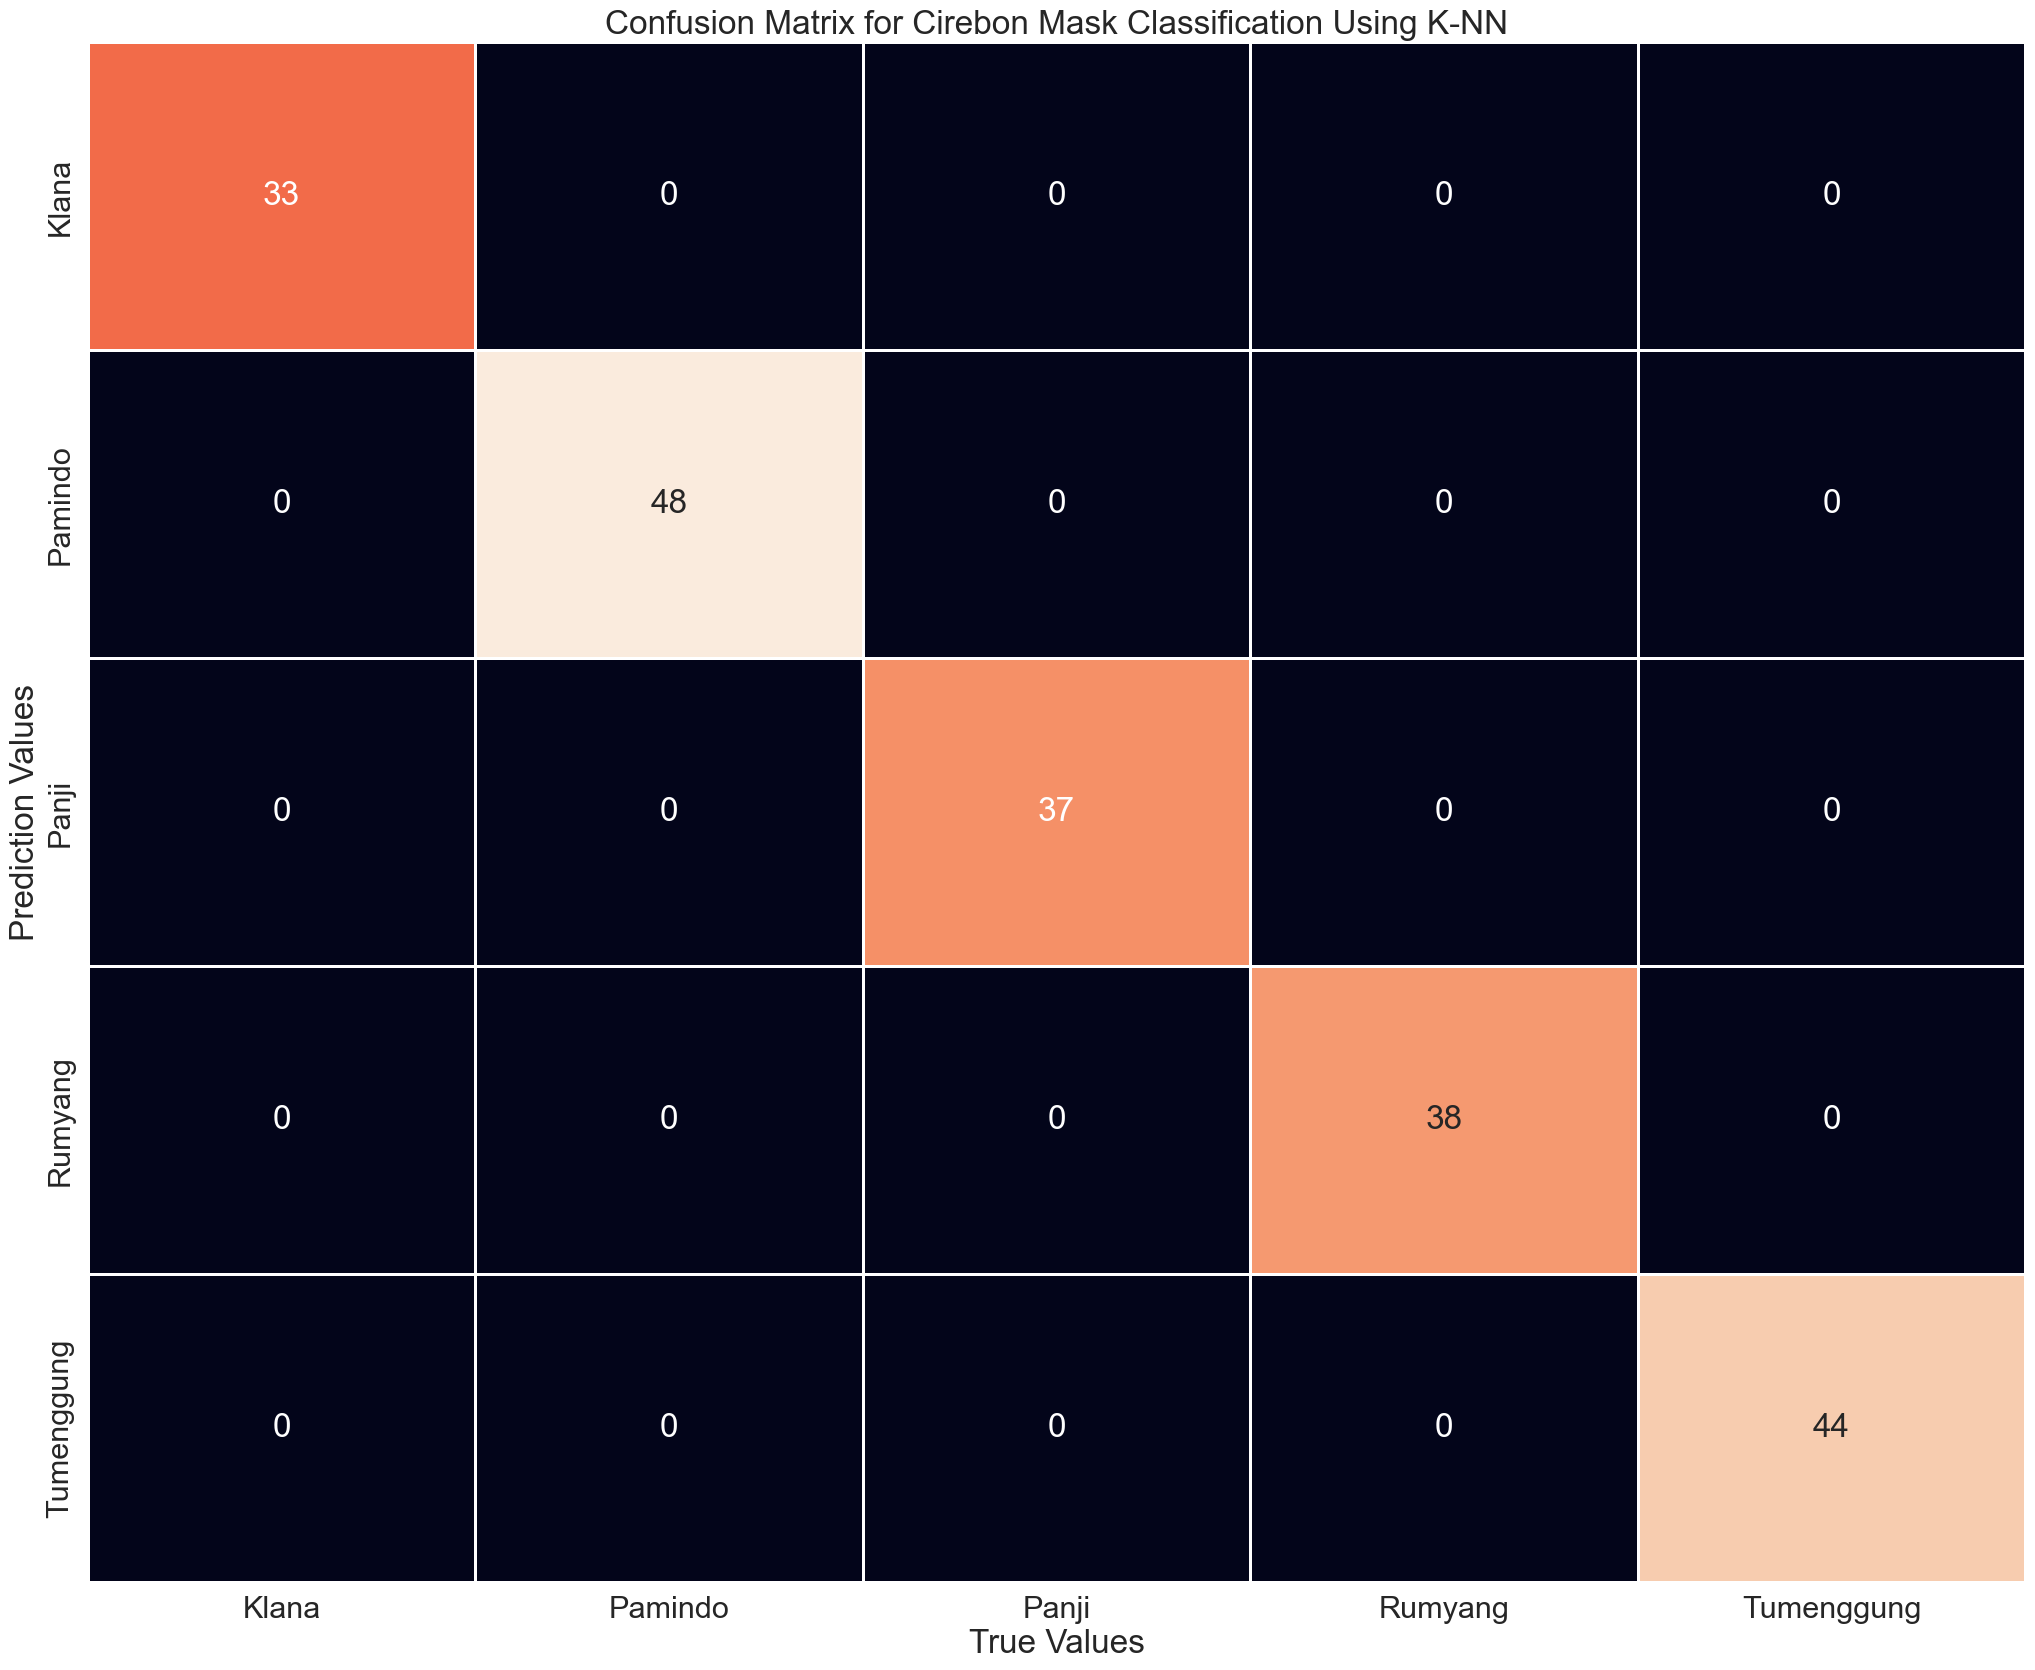

In [19]:
# Confusion Matrix
class_names = ['Klana',
               'Pamindo',
               'Panji',
               'Rumyang',
               'Tumenggung']

# Plotting a confusion matrix for checking the performance of our model
Y_pred = model_knn.predict(X_test)
cm = confusion_matrix(y_test, Y_pred, labels=np.unique(y_test), sample_weight=None)

df_cm = pd.DataFrame(cm, class_names, class_names)
sns.set(font_scale = 2)
plt.figure(figsize = (25, 20))
sns.heatmap(df_cm, annot = True, linewidths = 0.8, fmt = '0.4g', cbar = False)
plt.title("Confusion Matrix for Cirebon Mask Classification Using K-NN")
plt.xlabel("True Values")
plt.ylabel("Prediction Values")
plt.show()

## Hyperparameter Tuning

In [25]:
for k in range (1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    scores = cross_val_score(model, X_test, y_test, cv = 5)
    print("k = %d | akurasi = %0.2f | akurasi cv: %0.2f" %(k, score, scores.mean()))

k = 1 | akurasi = 1.00 | akurasi cv: 0.99
k = 2 | akurasi = 1.00 | akurasi cv: 0.99
k = 3 | akurasi = 1.00 | akurasi cv: 0.99
k = 4 | akurasi = 1.00 | akurasi cv: 0.99
k = 5 | akurasi = 1.00 | akurasi cv: 0.99
k = 6 | akurasi = 0.99 | akurasi cv: 0.99
k = 7 | akurasi = 0.99 | akurasi cv: 0.99
k = 8 | akurasi = 0.99 | akurasi cv: 0.99
k = 9 | akurasi = 1.00 | akurasi cv: 0.99
k = 10 | akurasi = 1.00 | akurasi cv: 0.97
k = 11 | akurasi = 1.00 | akurasi cv: 0.95
k = 12 | akurasi = 1.00 | akurasi cv: 0.95
k = 13 | akurasi = 1.00 | akurasi cv: 0.93
k = 14 | akurasi = 1.00 | akurasi cv: 0.93
k = 15 | akurasi = 0.99 | akurasi cv: 0.93
k = 16 | akurasi = 0.99 | akurasi cv: 0.93
k = 17 | akurasi = 0.99 | akurasi cv: 0.93
k = 18 | akurasi = 0.99 | akurasi cv: 0.93
k = 19 | akurasi = 0.99 | akurasi cv: 0.93


In [26]:
# melatih ulang classifier menggunakan nilai k terbaik value dan memprediksikan label
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [27]:
test_accuracy = model.score(X_test, y_test)
print(f"Achieved accuracy of {test_accuracy * 100}% on test data")

Achieved accuracy of 100.0% on test data


In [28]:
predictions = model.predict(X_test)
print("Classification Report for K-NN with k=5")
print(classification_report(y_test, predictions))

Classification Report for K-NN with k=5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        44

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



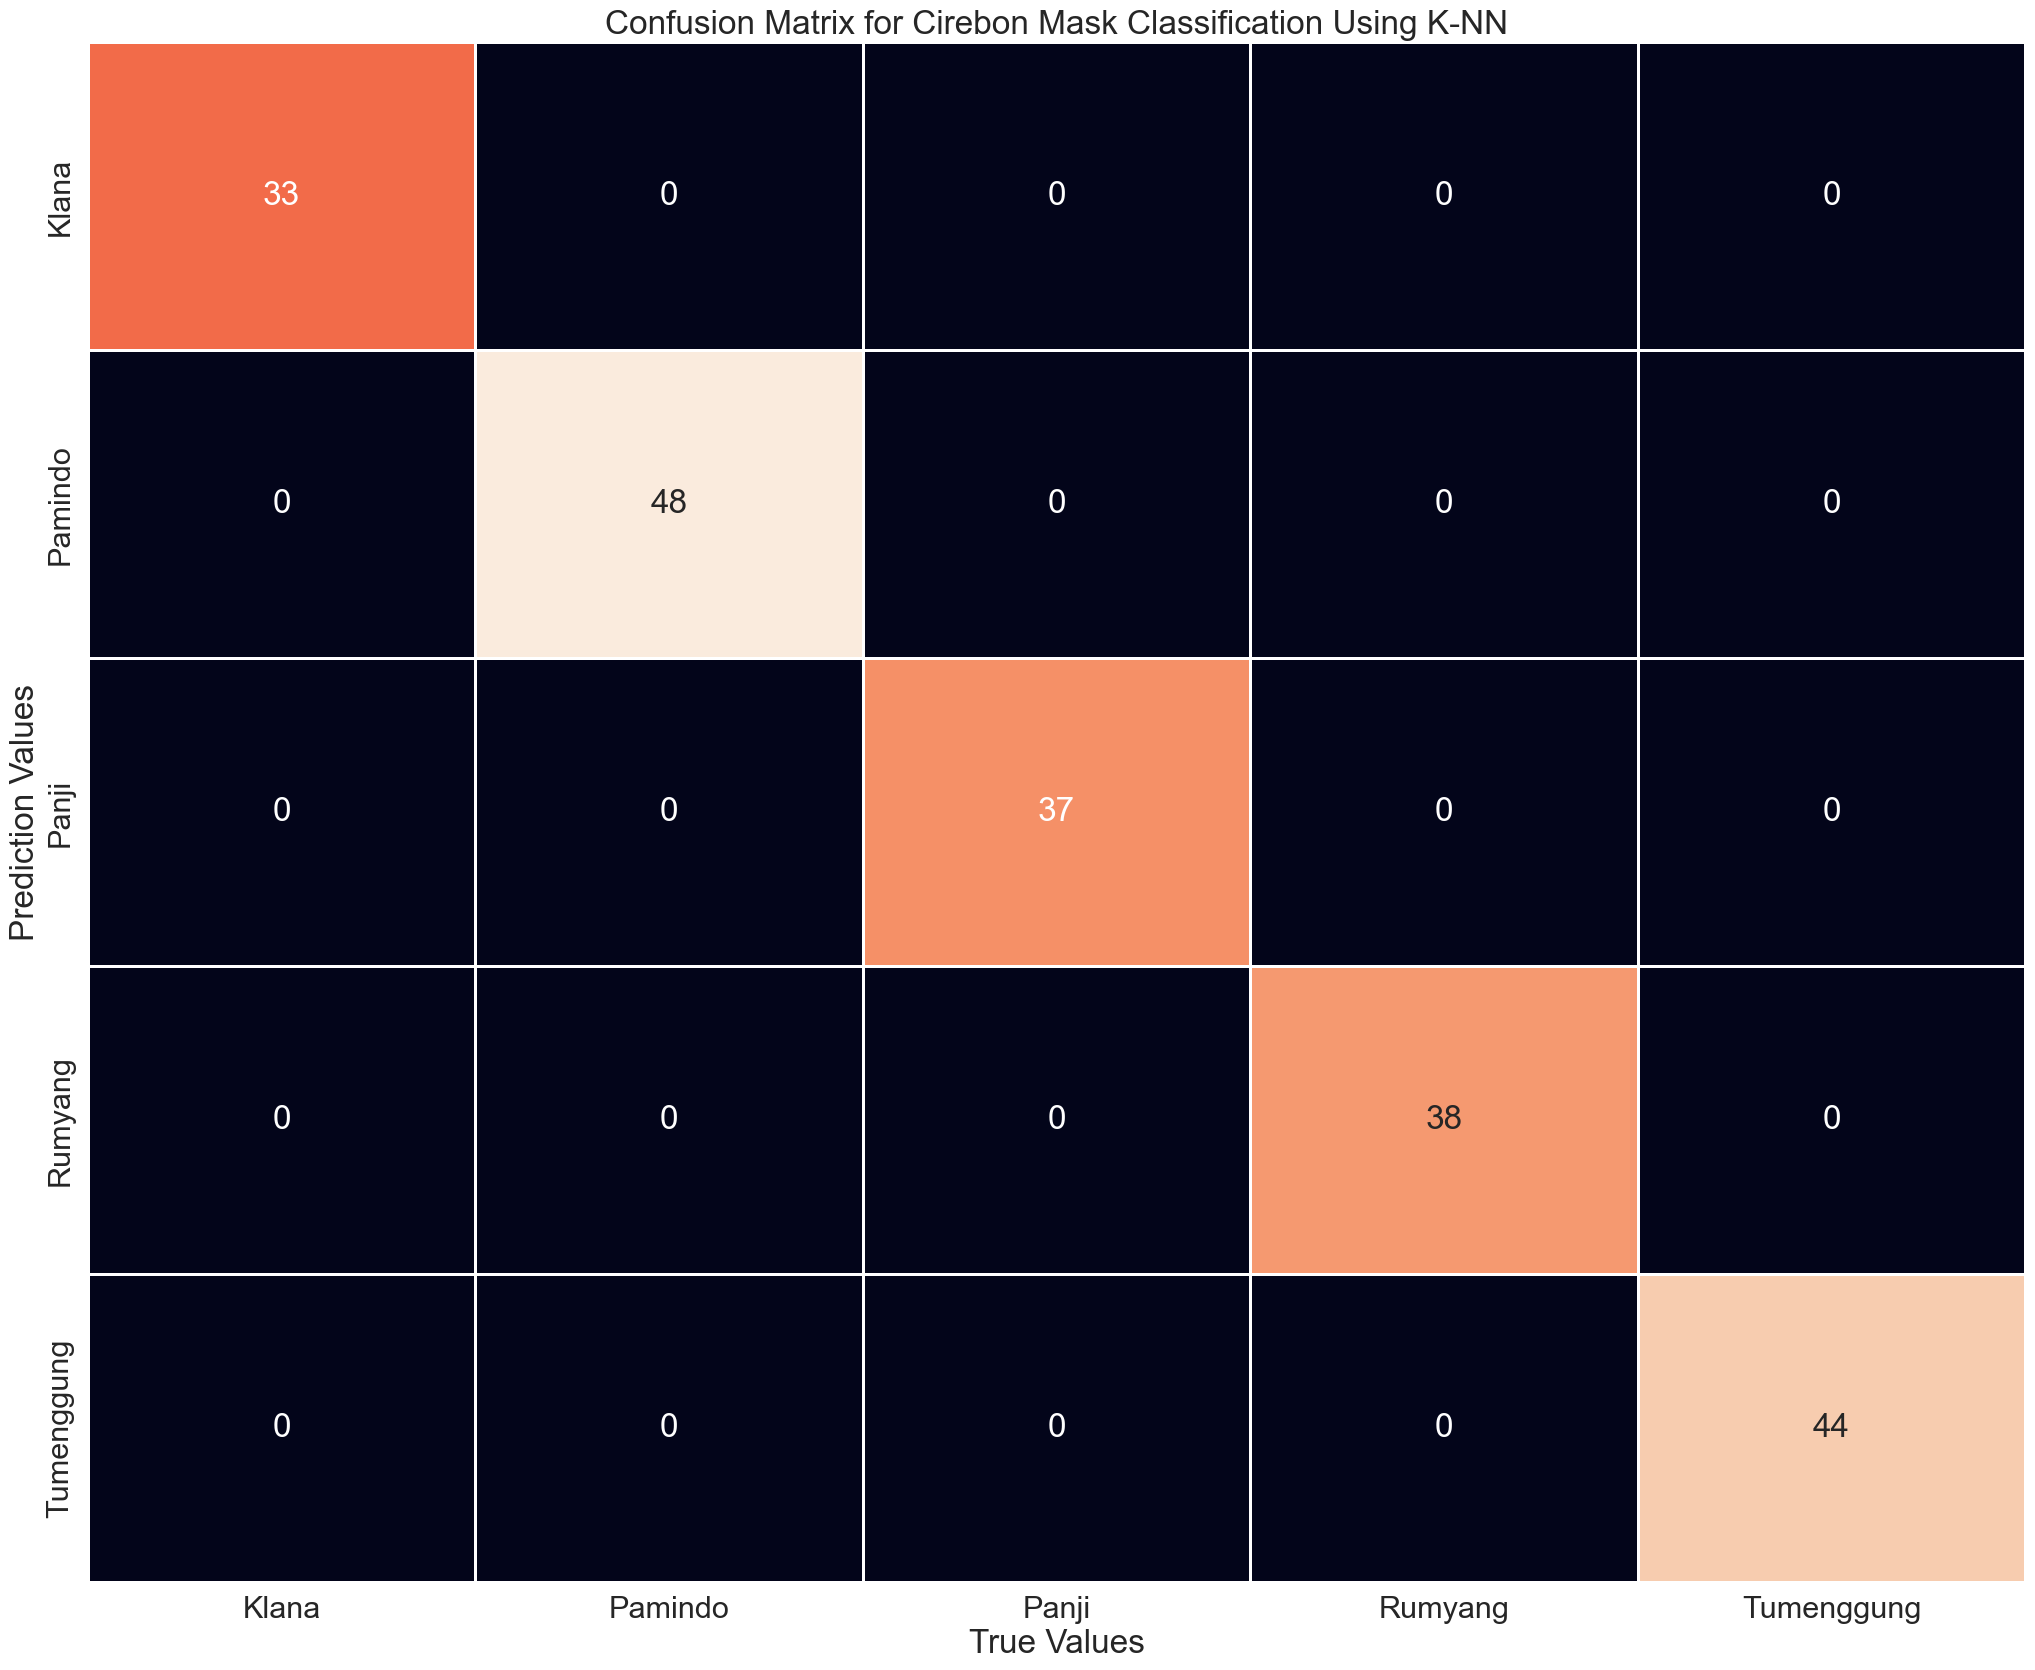

In [29]:
# Confusion Matrix
class_names = ['Klana',
               'Pamindo',
               'Panji',
               'Rumyang',
               'Tumenggung']

# Plotting a confusion matrix for checking the performance of our model
Y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, Y_pred, labels=np.unique(y_test), sample_weight=None)

df_cm = pd.DataFrame(cm, class_names, class_names)
sns.set(font_scale = 2)
plt.figure(figsize = (25, 20))
sns.heatmap(df_cm, annot = True, linewidths = 0.8, fmt = '0.4g', cbar = False)
plt.title("Confusion Matrix for Cirebon Mask Classification Using K-NN")
plt.xlabel("True Values")
plt.ylabel("Prediction Values")
plt.show()

## Save Model

In [33]:
filename = 'model/knn-mask.pkl'
file_name = 'model/knn-tuning.pkl'

pickle.dump(model_knn, open(filename, 'wb'))
pickle.dump(model, open(file_name, 'wb'))

In [34]:
# Load the Model
loaded_model = pickle.load(open(filename, 'rb'))
# Result the model
result = loaded_model.score(X_test, y_test)
print(f'Hasil terbaik model K-NN dengan k=3 adalah {result} persen!')

Hasil terbaik model K-NN dengan k=3 adalah 1.0 persen!


## Load Model

In [35]:
# Load the Model
load_model = pickle.load(open(file_name, 'rb'))
# Result the model
result = load_model.score(X_test, y_test)
print(f'Hasil terbaik model K-NN dengan k=5 adalah {result} persen!')

Hasil terbaik model K-NN dengan k=5 adalah 1.0 persen!


In [36]:
# Predict model K-NN with k=3
loaded_model.predict(X_test)

array([2, 3, 3, 3, 2, 3, 3, 2, 4, 0, 4, 0, 3, 4, 4, 4, 1, 4, 3, 1, 2, 0,
       1, 2, 1, 1, 0, 4, 4, 4, 1, 0, 3, 2, 1, 0, 3, 2, 4, 0, 1, 0, 1, 4,
       1, 1, 4, 3, 2, 4, 2, 4, 1, 2, 0, 0, 3, 0, 1, 4, 1, 0, 2, 1, 3, 3,
       3, 4, 0, 2, 0, 2, 2, 3, 1, 1, 3, 0, 2, 1, 3, 0, 1, 0, 1, 2, 4, 3,
       3, 1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 4, 3, 1, 4, 1, 3, 3, 2, 4, 0, 4,
       2, 4, 4, 4, 0, 2, 0, 4, 2, 1, 4, 2, 3, 1, 1, 2, 2, 2, 4, 4, 2, 4,
       1, 4, 2, 0, 0, 1, 0, 0, 0, 1, 3, 1, 4, 4, 4, 1, 4, 1, 3, 0, 4, 2,
       4, 2, 1, 3, 0, 4, 2, 3, 3, 3, 4, 3, 1, 3, 1, 1, 1, 2, 0, 4, 2, 1,
       1, 1, 4, 3, 2, 3, 1, 2, 4, 0, 1, 1, 4, 3, 4, 4, 3, 0, 1, 2, 1, 1,
       3, 0])

In [37]:
# Predict model K-NN with k=5
load_model.predict(X_test)

array([2, 3, 3, 3, 2, 3, 3, 2, 4, 0, 4, 0, 3, 4, 4, 4, 1, 4, 3, 1, 2, 0,
       1, 2, 1, 1, 0, 4, 4, 4, 1, 0, 3, 2, 1, 0, 3, 2, 4, 0, 1, 0, 1, 4,
       1, 1, 4, 3, 2, 4, 2, 4, 1, 2, 0, 0, 3, 0, 1, 4, 1, 0, 2, 1, 3, 3,
       3, 4, 0, 2, 0, 2, 2, 3, 1, 1, 3, 0, 2, 1, 3, 0, 1, 0, 1, 2, 4, 3,
       3, 1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 4, 3, 1, 4, 1, 3, 3, 2, 4, 0, 4,
       2, 4, 4, 4, 0, 2, 0, 4, 2, 1, 4, 2, 3, 1, 1, 2, 2, 2, 4, 4, 2, 4,
       1, 4, 2, 0, 0, 1, 0, 0, 0, 1, 3, 1, 4, 4, 4, 1, 4, 1, 3, 0, 4, 2,
       4, 2, 1, 3, 0, 4, 2, 3, 3, 3, 4, 3, 1, 3, 1, 1, 1, 2, 0, 4, 2, 1,
       1, 1, 4, 3, 2, 3, 1, 2, 4, 0, 1, 1, 4, 3, 4, 4, 3, 0, 1, 2, 1, 1,
       3, 0])